# Concepts

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Autocorrelation

It is the degree of similarity between a given time series and a lagged version of itself over successive time intervals

Autocorrelation is included in Lag plot as it is a statstic which can be deduced from it.

In [63]:
# Durbin-Watson test for autocorrelation:
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


class LagPlot:
    def __init__(self, df, val, lag = 1):
        self.df = df
        self.val = val
        self.lag = lag
    
    def saveplot(self, filename, show = False):
        fig, ax = plt.subplots(figsize = (12,7))
        pd.plotting.lag_plot(self.df[self.val], lag=self.lag)
        fig.savefig('/kaggle/working/' + filename +'.png')
        if show:
            fig.show()
    
    def autocorrelation(self):
        values = pd.DataFrame(self.df[self.val].values)
        df = pd.concat([values.shift(self.lag), values],axis=1)
        df.columns = ['X', 'y']
        df.dropna(axis = 0, inplace=True)
        y_test = df['X'].to_numpy()
        y_pred = df['y'].to_numpy()
        residuals = y_pred - y_test 
        return durbin_watson(residuals)

    # def summary(self):

In [64]:
df = pd.read_csv('/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv')

In [65]:
lp = LagPlot(df, 'Monthly beer production')


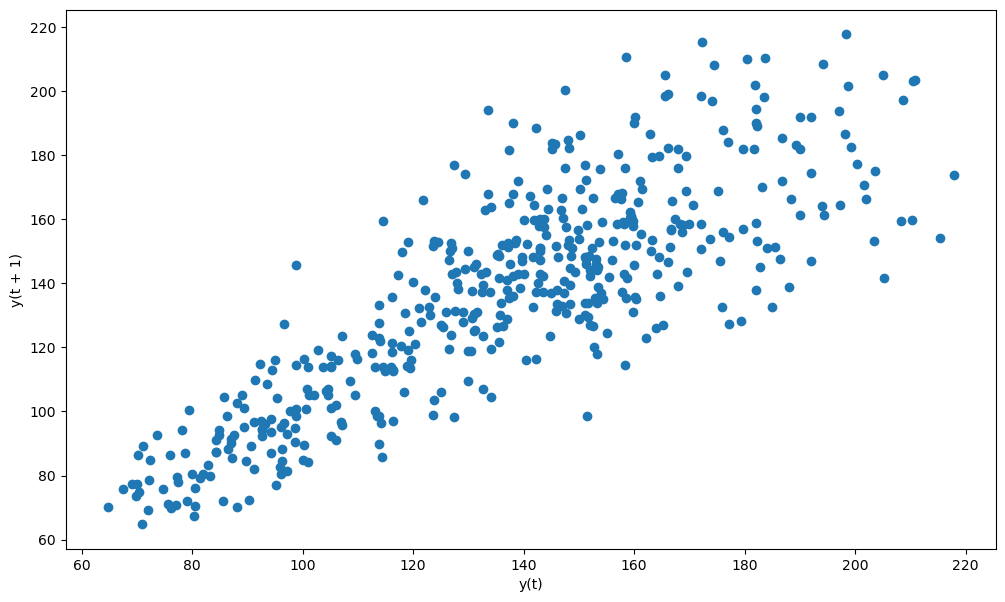

In [66]:
lp.saveplot('lagplot', True)

In [67]:
lp.autocorrelation()

2.4488998567747133

### Summary generation:
        Positive autocorrelation does not exist if value is close to 2
        Value less than 2 may signify positive autocorrelation
        Value more than 2 may signify negative autocorrelation

## Stationarity

In [68]:
from statsmodels.tsa.stattools import adfuller, kpss


class Stationarity:
    def __init__(self, df, x, y):
        self.df = df
        self.x = x
        self.y = y
        
    def summary(self, showplot = False, test = 'adf'):
        if showplot:
            plt.figure(figsize=(16,5))
            plt.plot(self.df[self.x], self.df[self.y], label = self.y)
            plt.legend(loc='best')
            plt.show()
        if test == 'adf':
            print ('Results of Dickey-Fuller Test:')
            dftest = adfuller(self.df[self.y], autolag='AIC')
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            for key,value in dftest[4].items():
                dfoutput['Critical Value (%s)'%key] = value
            print(dfoutput)
        elif test == 'kpss':
            print ('Results of KPSS Test:') 
            kpsstest = kpss(self.df[self.y], regression='c', nlags="auto")
            kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
            for key,value in kpsstest[3].items():
                kpss_output['Critical Value (%s)'%key] = value
            print(kpss_output)
        # elif test == 'pp':
        else:
            print("No such test: "+ test)
            
        
        
            

In [69]:
df = pd.read_csv('/kaggle/input/time-series-datasets/sales-of-shampoo-over-a-three-ye.csv')

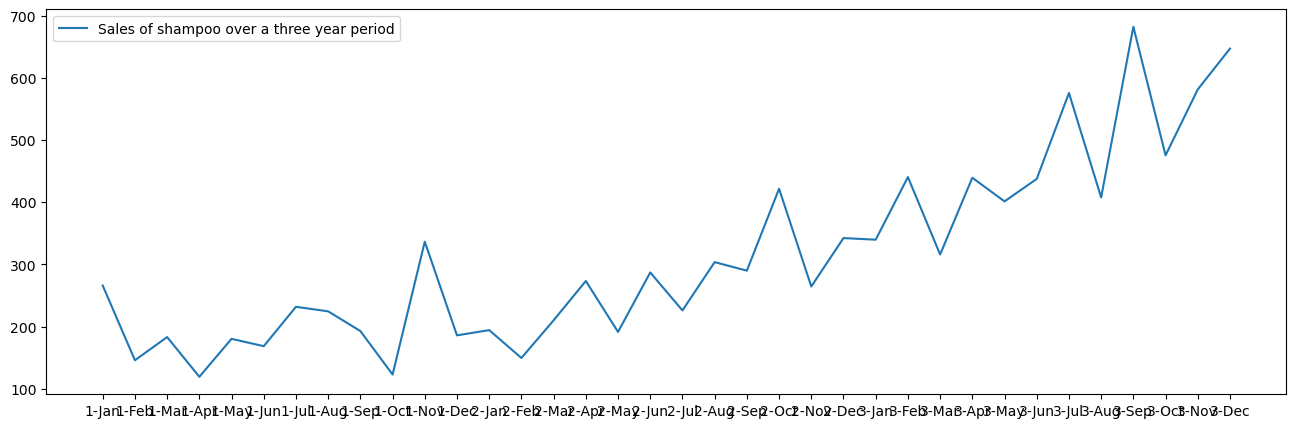

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [70]:
s = Stationarity(df, 'Month', 'Sales of shampoo over a three year period')
s.summary(True, 'adf')

In [71]:
df = pd.read_csv('/kaggle/input/time-series-datasets/Electric_Production.csv')

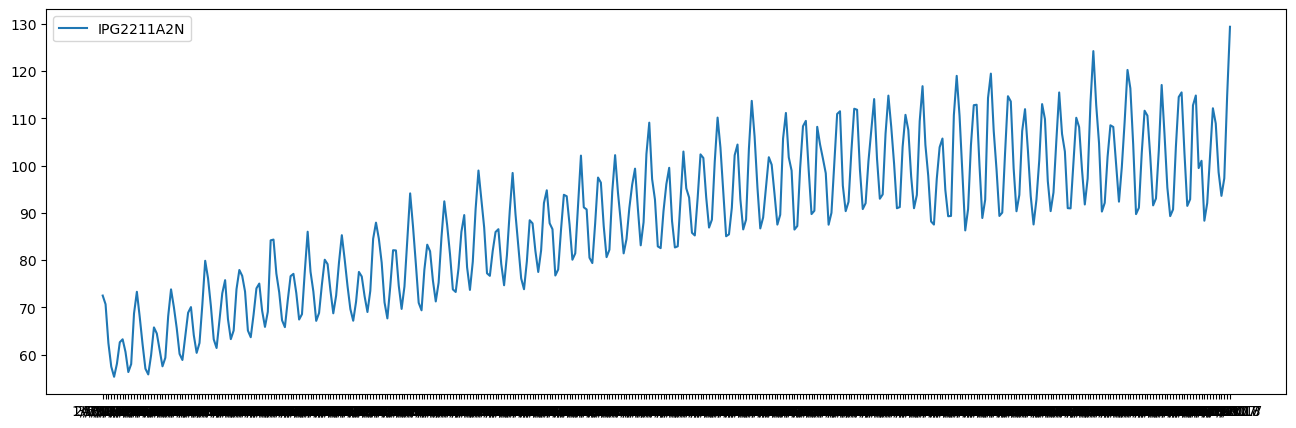

Results of KPSS Test:
Test Statistic            3.531597
p-value                   0.010000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_28/2272801173.py:25: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(self.df[self.y], regression='c', nlags="auto")


In [72]:
s = Stationarity(df, 'DATE', 'IPG2211A2N')
s.summary(True, 'kpss')

## ETS Decomposition

Error-Trend-Seasonality Decomposition

In [73]:
df = pd.read_csv('/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv', index_col = 'Month')

In [74]:
df.head()

,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9


<Axes: xlabel='Month'>

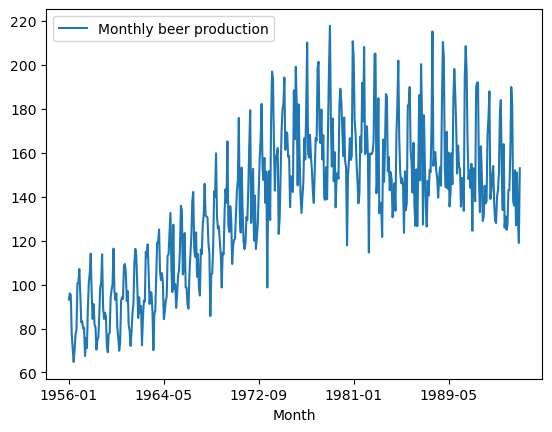

In [75]:
df.plot()

In [76]:
df.index = pd.to_datetime(df.index)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


### Decomposition

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
class ETSDecomposition:
    def __init__(self, series: pd.Series):
        self.decomposition = seasonal_decompose(series, model = 'multiplicative')
    
    def error_plot(self):
        self.decomposition.resid.plot()
        
    def trend_plot(self):
        self.decomposition.trend.plot()
    
    def seasonality_plot(self):
        self.decomposition.seasonal.plot()
    
    def ets_decomposition_plot(self):
        self.decomposition.plot()
    
    
        

In [97]:
decomp = ETSDecomposition(df['Monthly beer production'])

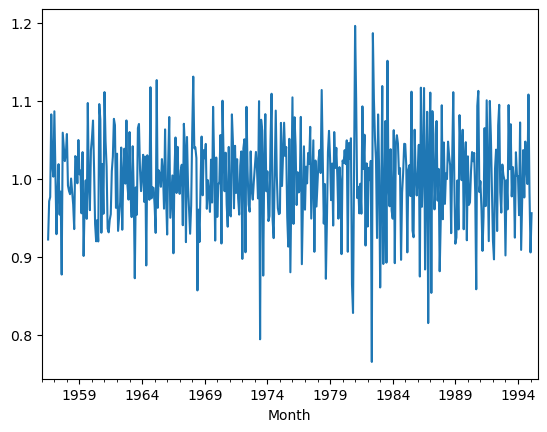

In [98]:
decomp.error_plot()

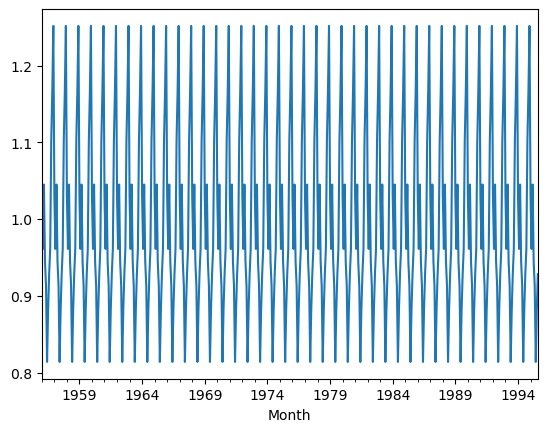

In [99]:
    decomp.seasonality_plot()

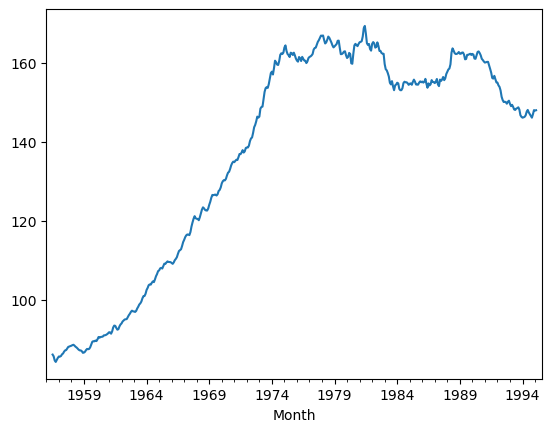

In [100]:
decomp.trend_plot()

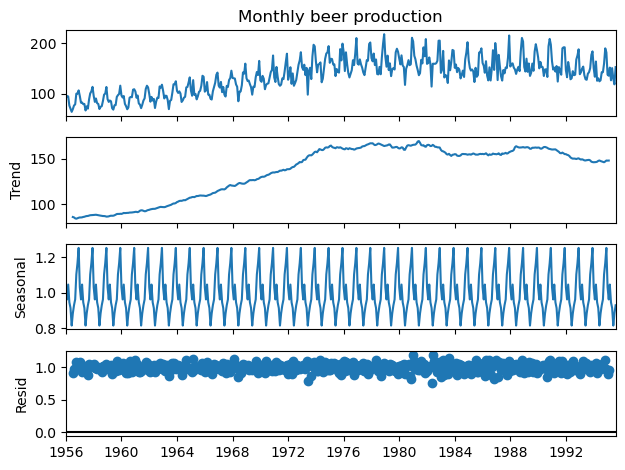

In [101]:
decomp.ets_decomposition_plot()